# Practical Session 1 - High level view of ML

This is the first practical session. In this session we will see how to setup a machine learning problem.
We will first generate a toy problem to have control over our data and plot it.

Then we will see how to fit an easy model. We will then compute its mean error, plot its prediction and see what happens when changing the data

Finally we will use more powerful model and redo this analysis.

## A dummy regression task

### Generating data
Let us assume that our data is just some samples 'x' and the underlying hidden relationship is a simple function of x :
$y(x) = 1.3 x^3 - 3x^2 + 3.6^x + 6.9$
We want to take random points in a certain range uniformly, which can be done with np.random.uniform.

Get 100 random points between -1 and 3. Compute their label. Also create a noisy version of these : you can do so by adding small noise (take the default settings).

In [120]:
import numpy as np
np.random.seed(20)

def base_function():
    f = lambda x: 1.3 * x ** 3 - 3 * x ** 2 + 3.6 * x + 6.9
    return f

low, high = -1, 3
n_points = 100

bfunc = base_function()
xs = np.random.uniform(low, high, n_points)
ys_noise = np.random.normal(size=len(xs))
sample_ys = bfunc(xs) 
noisy_sample_ys = sample_ys + ys_noise

### Plotting our data
The most used plotting tool for Python is matplotlib.pyplot, also often complemented by seaborn.
You should use the functions plot (draw a line) and scatter (draw points) for most of this class.

To plot a function, the most common way is to generate evenly spaced points using np.linspace. Then you can transform them with your function and use plot to see your function. Plot the base function in the interval [-1, 3]

Also plot the data you generated using a scatter plot.

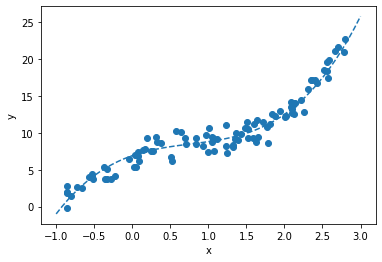

In [121]:
import matplotlib.pyplot as plt

lsp = np.linspace(low, high)[:, None]
true_ys = bfunc(lsp)
plt.plot(lsp, true_ys, linestyle='dashed')

plt.scatter(xs, noisy_sample_ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Fitting a simple model : Linear Regression

Use scikit learn LinearRegression object to fit a model on your noisy samples.
Once fitted, plot the resulting model along with the samples. Does this look good to you ?

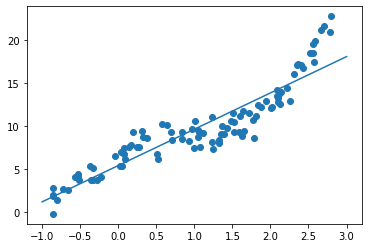

In [122]:
from sklearn import linear_model
xs = xs[:, None]
model = linear_model.LinearRegression()
model.fit(xs, noisy_sample_ys)
predicted_lsp = model.predict(lsp)
plt.scatter(xs, noisy_sample_ys)
plt.plot(lsp, predicted_lsp)

### Quantitative assessment of the quality

We want to know how good/bad is our model. To do so we will use numpy to compute the mean absolute difference over our samples.

In [123]:
predicted_samples = model.predict(xs)
absolute_difference =  np.abs(predicted_samples - noisy_sample_ys)
absolute_difference.mean()

1.4935954152067135

This is hard to interpret per se. However we can see what would happen if the noise around the model would be greatly augmented. Generate a new set of labels with a noise sampled with a scale parameter of 3.

2.4766875308924026

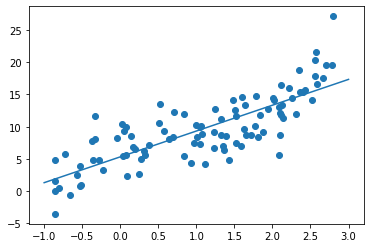

In [124]:
ys_noise = np.random.normal(size=len(xs), scale=3)
very_noisy_sample_ys = sample_ys + ys_noise
plt.scatter(xs, very_noisy_sample_ys)

noisy_model = linear_model.LinearRegression()
noisy_model.fit(xs, very_noisy_sample_ys)

predicted_lsp = noisy_model.predict(lsp)
plt.plot(lsp, predicted_lsp)

predicted_samples = noisy_model.predict(xs)
absolute_difference =  np.abs(predicted_samples - very_noisy_sample_ys)
absolute_difference.mean()

### Towards a more complicated model : a first neural network

Let us now go back to our original data. 

We want to replace the previous simple linear model, with a very simple neural network. We don't have to code it, there exist an easy one already implemented in scikit learn : MLPRegressor(max_iter=5000). 
Redo the same plot as before and see how the fit now looks better.

You can try changing the number of iterations or playing a bit with the parameters and see the impact on the fit. 

(100, 1)


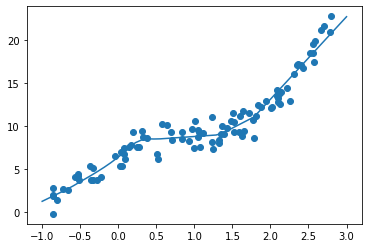

In [125]:
from sklearn.neural_network import MLPRegressor
print(xs.shape)
mlp_model = MLPRegressor(max_iter=5000)
mlp_model.fit(xs, noisy_sample_ys)
predicted_lsp = mlp_model.predict(lsp)
plt.scatter(xs, noisy_sample_ys)
plt.plot(lsp, predicted_lsp)

Compute the mean absolute difference as before. What can you say about the metrics ?

In [126]:
predicted_samples = mlp_model.predict(xs)
absolute_difference =  np.abs(predicted_samples - noisy_sample_ys)
absolute_difference.mean()

0.8350197661728658

## A dummy classification task now

Let us redo most steps but in classification setting : The new function we want to learn is the arbitrary following one : 
$y(x) = round(\frac{1}{1+(1.3 x^3 - 5 x^2 + 3.6^x + 1.6)})$
It is already implemented and returns either zero or one.

Redo the previous steps of generating and plotting the data as well as the underlying relationship.

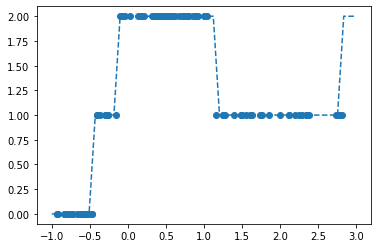

In [129]:
def base_function():
    f = lambda x: np.round(2/(1+np.exp(-(1.3 * x ** 3 - 5 * x ** 2 + 3.6 * x + 1.6))))
    return f
bfunc = base_function()

low, high = -1, 3
n_points = 100

lsp = np.linspace(low, high)[:, None]
true_ys = bfunc(lsp)
plt.plot(lsp, true_ys, linestyle='dashed')

xs = np.random.uniform(low, high, n_points)
sample_ys = bfunc(xs) 
xs = xs[:, None]
plt.scatter(xs, sample_ys)

Now fit a small neural network using scikit learn again, using MLPClassifier(max_iter=5000). Can this model properly learn the underlying function ?


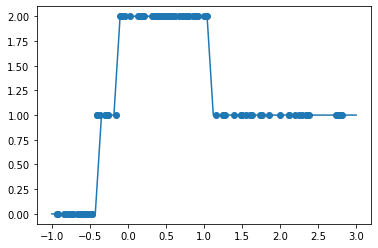

In [130]:
from sklearn.neural_network import MLPClassifier


mlp_model = MLPClassifier(max_iter=5000)
mlp_model.fit(xs, sample_ys)
predicted_lsp = mlp_model.predict(lsp)
plt.scatter(xs, sample_ys)
plt.plot(lsp, predicted_lsp)

Now the absolute difference does not really make sense as a metric. We can count the error rate. This amounts to to the ratio of the predictions where the predicted value and the true one differ. What is the error rate of your model ?

In [133]:
predicted_samples = mlp_model.predict(xs)
errors = predicted_samples!= sample_ys
errors.sum()/len(errors)

0.01